<h1>Feature Selection</h1>
<p>Finding relationships between features using Variance, Correlation, and Covariance
<p>https://www.youtube.com/watch?v=iJ5c-XoHPFo


<h2>What's the Purpose of Feature Selection</h2>
<p>Many learning algorithms perform poorly on high-dimensional data. This is known as the <b>curse of dimensionality</b>
    <p>There are other reasons we may wish to reduce the number of features including:
        <p>1. Reducing computational cost
            <p>2. Reducing the cost associated with data collection
                <p>3. Improving Interpretability

<h2>Dataset: Boston Housing Data</h2>

<p><b>Dependent Variable: MEDV:</b> Median value of owner-occupied homes in 1000's of dollars
<p><b>Explanatory Variables</b></p>
<p><b>CRIM:</b> per capita crime rate by town
<p><b>ZN:</b> proportion of residential land zoned for lots over 25,000 sq.ft.
<p><b>INDUS:</b> proportion of non-retail business acres per town
<p><b>CHAS:</b> Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
<p><b>NOX:</b> nitric oxides concentration (parts per 10 million)
<p><b>RM:</b> average number of rooms per dwelling
<p><b>AGE:</b> proportion of owner-occupied units built prior to 1940
<p><b>DIS:</b> weighted distances to five Boston employment centres
<p><b>RAD:</b> index of accessibility to radial highways
<p><b>TAX:</b> full-value property-tax rate per 10,000 dollars
<p><b>PTRATIO:</b>  pupil-teacher ratio by town
<p><b>B:</b> 1000(Bk - 0.63)^2 where Bk is the proportion of black residents by town
<p><b>LSTAT:</b> lower status of the population


In [2]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

In [3]:
boston_data=load_boston()

In [4]:
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston['MEDV'] = boston_data.target
# Why do we use dummy variables?: https://www.marsja.se/how-to-use-pandas-get_dummies-to-create-dummy-variables-in-python/
dummies = pd.get_dummies(boston.RAD) # 1-8, 24 could be confusingly treted like regression. Use dummies to make these categorical.
boston = boston.drop(columns='RAD').merge(dummies,left_index=True,right_index=True)
X = boston.drop(columns='MEDV')
y = boston.MEDV

In [5]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222.0,18.7,...,28.7,0,0,1,0,0,0,0,0,0
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,311.0,15.2,...,22.9,0,0,0,0,1,0,0,0,0
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,311.0,15.2,...,27.1,0,0,0,0,1,0,0,0,0
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,311.0,15.2,...,16.5,0,0,0,0,1,0,0,0,0
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,311.0,15.2,...,18.9,0,0,0,0,1,0,0,0,0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt

cv = KFold(n_splits=10, shuffle=False)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y, y_pred)), 2)) +
      "\nThis is the average deviation between the predicted house price (000s) and the actual house price")
print("R_squared: " + str(round(r2_score(y, y_pred), 2)) + "\nThis tells us that the features we selected to use in the model are able to explain " +
      str(round(r2_score(y, y_pred), 2)*100) + "% of the variation in house prices")


RMSE: 6.51
This is the average deviation between the predicted house price (000s) and the actual house price
R_squared: 0.5
This tells us that the features we selected to use in the model are able to explain 50.0% of the variation in house prices


<h2>Filter Features by Variance </h2>

Remove features that have a lower variance (not much say in the predicted value)

Features with high variance will result in significant changes to the projections of the target function.

If a feature was split into multiple dummy variables - it does not make much sense to remove some dummy cariables and not others, even if it appears to improve RSME and R2.

In [7]:
boston.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
1.0            0.038039
2.0            0.045271
3.0            0.069597
4.0            0.170469
5.0            0.175968
6.0            0.048840
7.0            0.032532
8.0            0.045271
24.0           0.193198
dtype: float64

In [8]:
lower_variance = [feature for feature, value in dict(X.var()).items() if value < 0.2]
lower_variance

['CHAS', 'NOX', 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 24.0]

In [9]:
X = X.drop(columns=lower_variance)
X

,CRIM,ZN,INDUS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [10]:
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)) + "\nThis is the average deviation between the predicted house price (000s) and the actual house price")
print("R_squared: " + str(round(r2_score(y, y_pred), 2)) + "\nThis tells us that the features we selected to use in the model are able to explain " + str(round(r2_score(y, y_pred), 2)*100) + "% of the variation in house prices")


RMSE: 5.33
This is the average deviation between the predicted house price (000s) and the actual house price
R_squared: 0.66
This tells us that the features we selected to use in the model are able to explain 66.0% of the variation in house prices


<h2>Filter Features by Correlation</h2>

Keep only the features that are more highly correlated with the predicted value.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

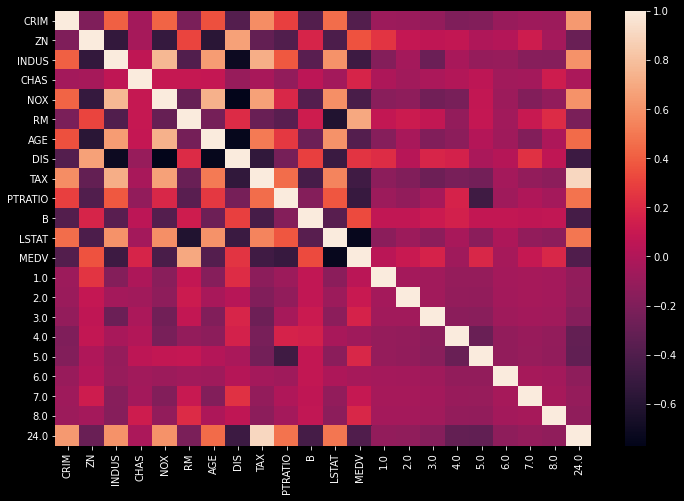

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(boston.corr(), ax=ax)
plt.show()


In [13]:
abs(boston.corr()["MEDV"])

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
1.0        0.040453
2.0        0.104444
3.0        0.167352
4.0        0.065711
5.0        0.187356
6.0        0.039411
7.0        0.092802
8.0        0.190053
24.0       0.396297
Name: MEDV, dtype: float64

In [14]:
vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
best = [0, float('inf'), []]  # r2, RMSE, features

for val in vals:
    features = abs(boston.corr()["MEDV"][abs(
        boston.corr()["MEDV"]) > val].drop('MEDV')).index.tolist()

    X = boston.drop(columns='MEDV')
    X = X[features]

    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    rmse = round(sqrt(mean_squared_error(y, y_pred)), 2)
    r2 = round(r2_score(y, y_pred), 2)
    if r2 > best[0]:
        best = [r2, rmse, features]

print("RMSE: " + str(best[1]))
print("R_squared: " + str(best[0]))
print("features: " + str(best[2]))


RMSE: 4.73
R_squared: 0.74
features: ['RM', 'PTRATIO', 'LSTAT']


<h2>Filter Features by Covariance</h2>

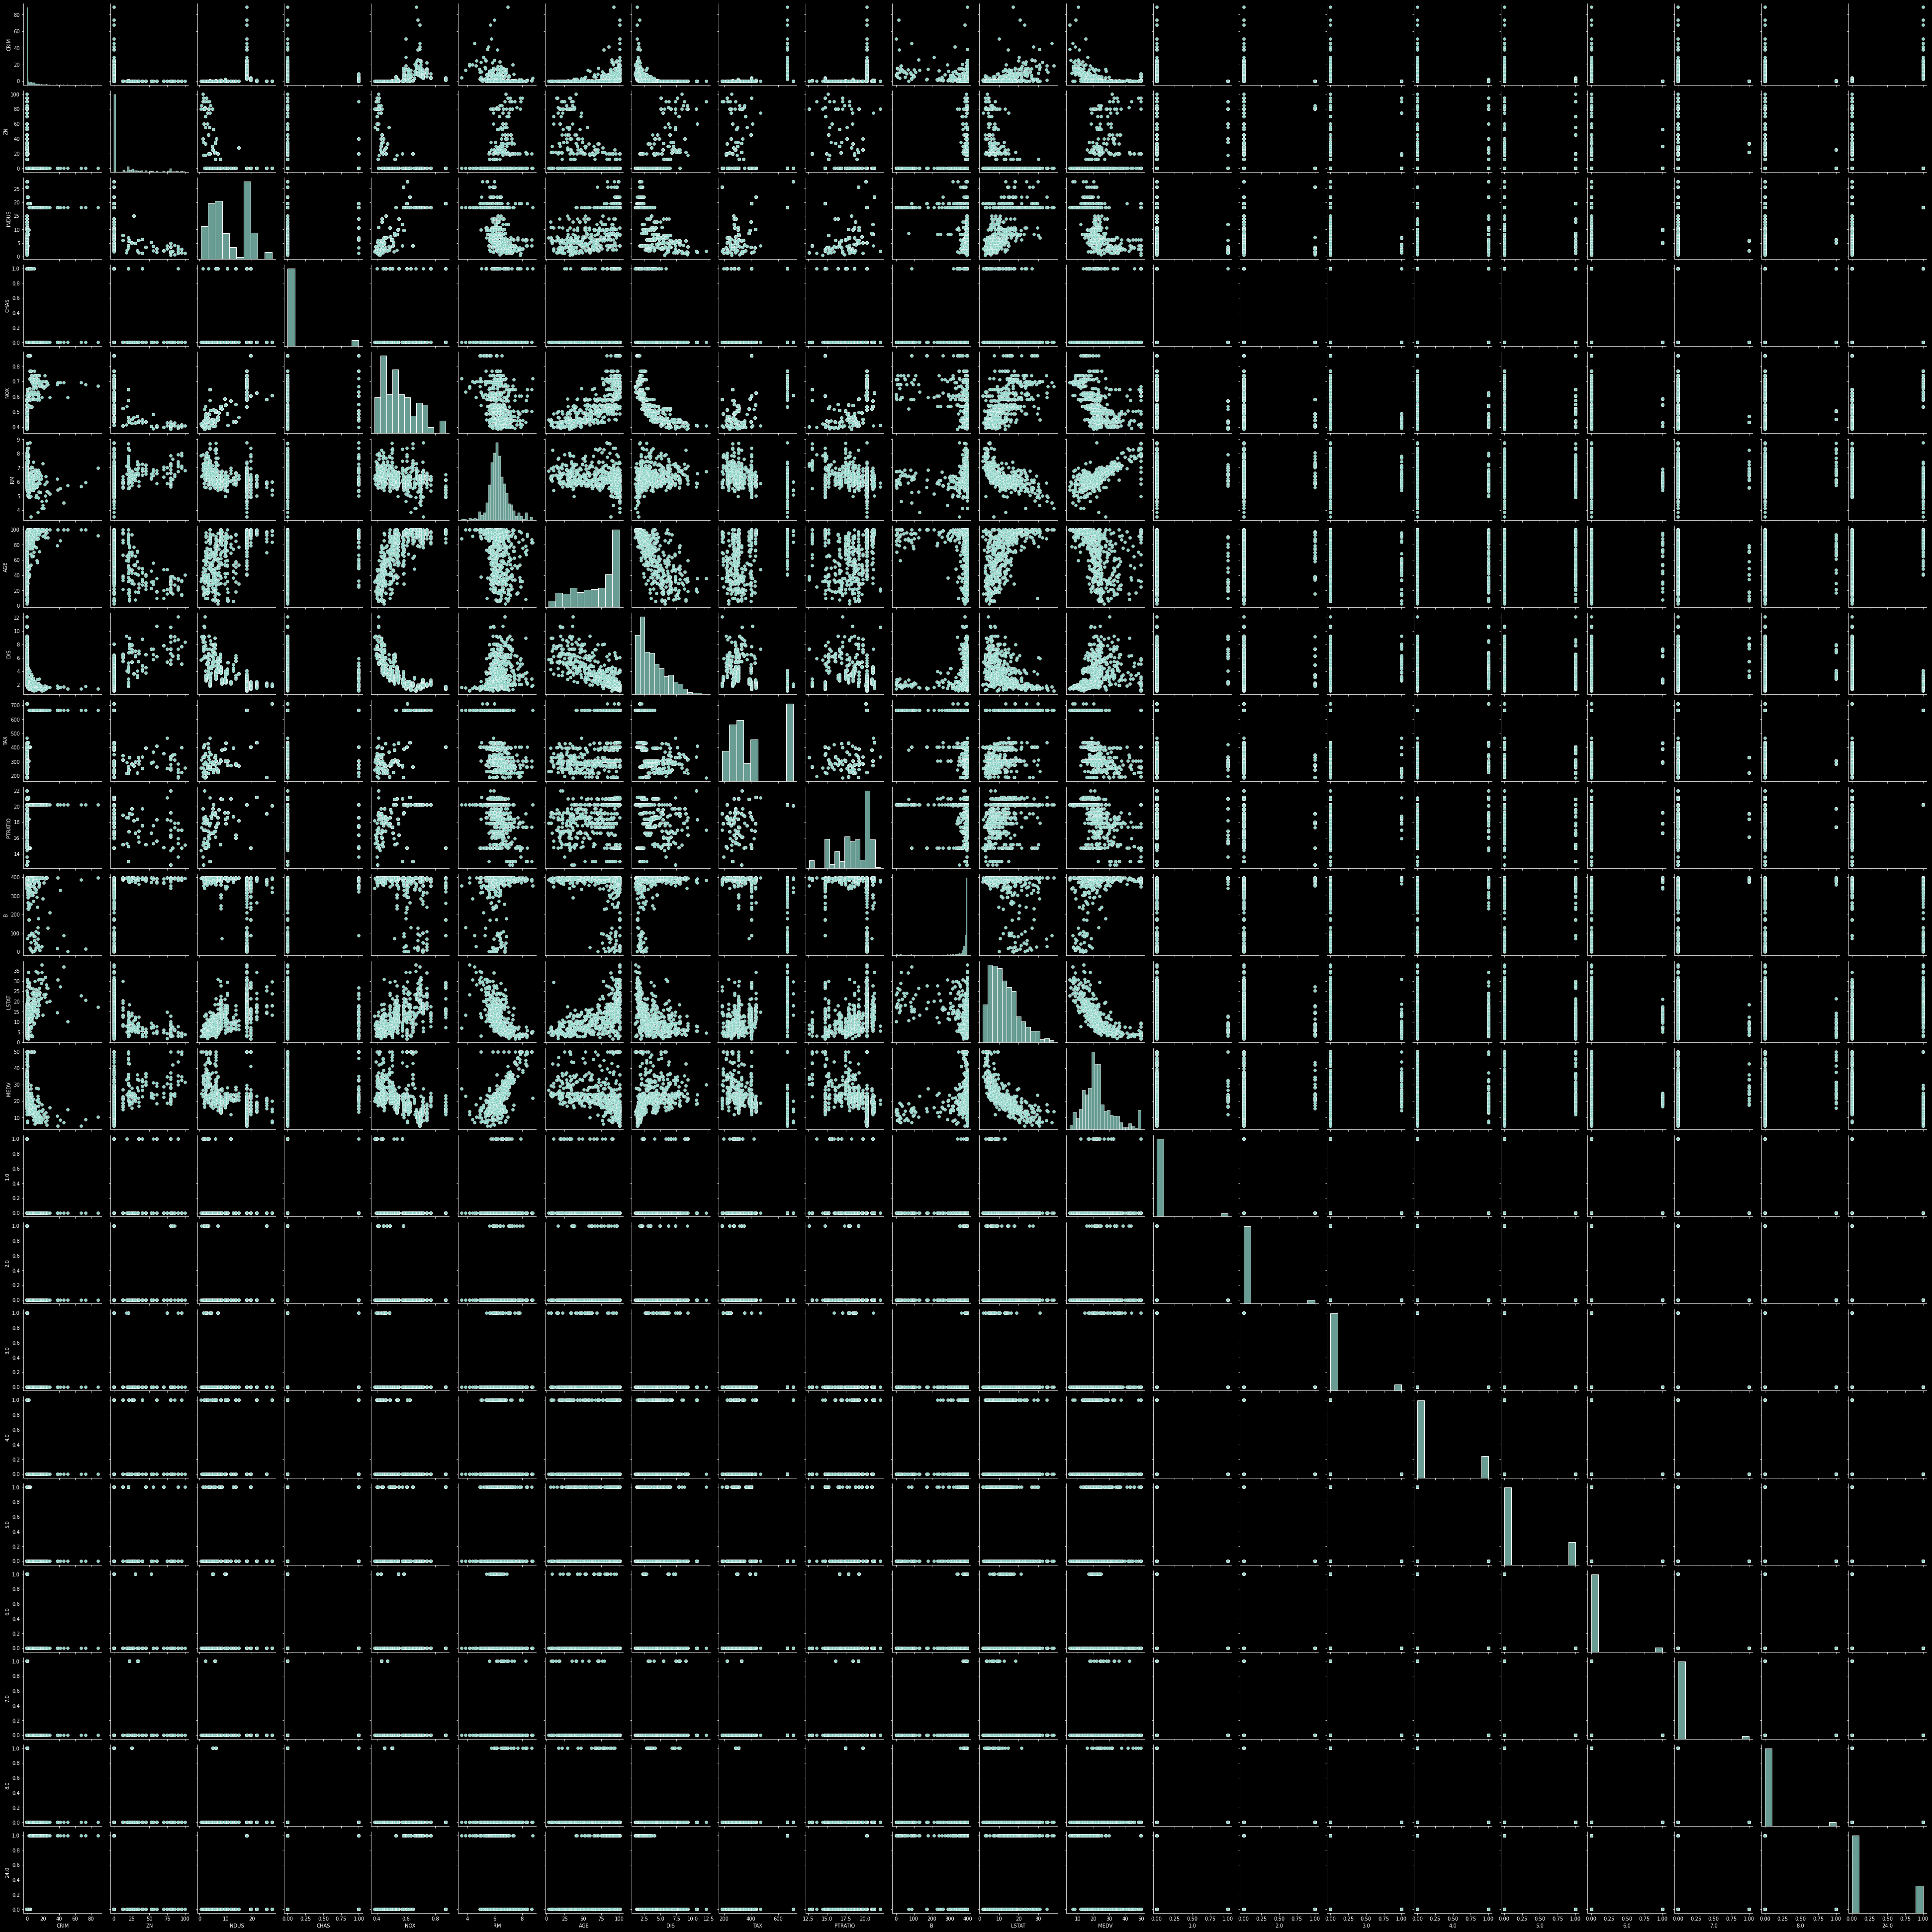

In [15]:
sns.pairplot(boston)

In [16]:
boston.iloc[:, :].values.shape

(506, 22)

<Figure size 432x288 with 0 Axes>

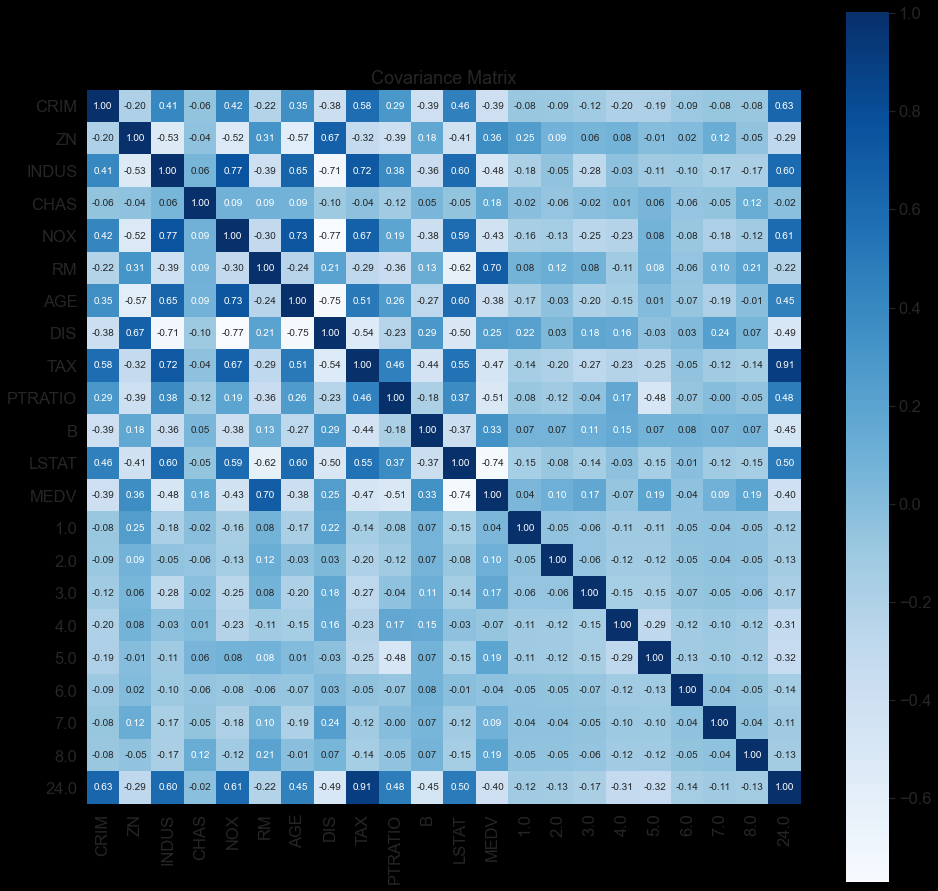

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Standardize features by removing the mean and scaling to unit variance.
X_sc = sc.fit_transform(boston.iloc[:, :].values)
cov_mat = np.cov(X_sc.T)
plt.tight_layout()
plt.figure(figsize=(16,16))
sns.set(font_scale=1.5)
heatmap = sns.heatmap(cov_mat, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap='Blues', yticklabels=boston.columns, xticklabels=boston.columns)
plt.title('Covariance Matrix')
plt.show()

In [18]:
cov_mat_df = pd.DataFrame(
    cov_mat, columns=boston.columns, index=boston.columns)

vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
best = [0, float('inf'), []] # r2, RMSE, features

for val in vals:
    features = abs(cov_mat_df[["MEDV"]][abs(cov_mat_df[['MEDV']]) > 0.5].drop(
        'MEDV')).dropna().squeeze().index.tolist()

    X = boston.drop(columns='MEDV')
    X = X[features]

    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    rmse = round(sqrt(mean_squared_error(y, y_pred)), 2)
    r2 = round(r2_score(y, y_pred), 2)
    if r2 > best[0]:
        best = [r2, rmse, features] 

print("RMSE: " + str(best[1]))
print("R_squared: " + str(best[0]))
print("features: " + str(best[2]))


RMSE: 4.73
R_squared: 0.74
features: ['RM', 'PTRATIO', 'LSTAT']


## Feature Selection Using a Wrapper - Not Done. Need to download mlxtend.


In [19]:
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston['MEDV'] = boston_data.target
boston['RAD'] = boston['RAD'].astype('category')
dummies = pd.get_dummies(boston.RAD)
boston = boston.drop(columns='RAD').merge(dummies,left_index=True,right_index=True)
X = boston.drop(columns='MEDV')
y = boston.MEDV

In [20]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
sfs1 = SFS(classifier_pipeline, 
           k_features=1, 
           forward=False, 
           scoring='neg_mean_squared_error',
           cv=cv)

X = boston.drop(columns='MEDV')

sfs1.fit(X,y)

sfs1.subsets_

{21: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20),
  'cv_scores': array([ -20.01483529,  -38.77619216,  -19.22183529,  -66.60270392,
          -59.90746667,  -61.32327843,  -15.753274  , -107.234396  ,
          -20.92415   ,  -13.922834  ]),
  'avg_score': -42.36809657647059,
  'feature_names': ('CRIM',
   'ZN',
   'INDUS',
   'CHAS',
   'NOX',
   'RM',
   'AGE',
   'DIS',
   'TAX',
   'PTRATIO',
   'B',
   'LSTAT',
   1.0,
   2.0,
   3.0,
   4.0,
   5.0,
   6.0,
   7.0,
   8.0,
   24.0)},
 20: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   20),
  'cv_scores': array([ -20.01483529,  -19.49721765,  -19.22183529,  -74.59283333,
          -44.45047059,  -53.63635098,  -15.796332  , -106.83866   ,
          -20.92415   ,  -13.922834  ]),
  'avg_score': -38.8895519137255,
  'feature_names': ('C

In [ ]:
X = boston.drop(columns='MEDV')[['CRIM','RM','PTRATIO','LSTAT']]
y = boston['MEDV']
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 4.458
R_squared: 0.765


In [ ]:
boston[['CRIM','RM','PTRATIO','LSTAT','MEDV']].corr()

,CRIM,RM,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.219247,0.289946,0.455621,-0.388305
RM,-0.219247,1.000000,-0.355501,-0.613808,0.695360
PTRATIO,0.289946,-0.355501,1.000000,0.374044,-0.507787
LSTAT,0.455621,-0.613808,0.374044,1.000000,-0.737663
MEDV,-0.388305,0.695360,-0.507787,-0.737663,1.000000


In [ ]:
boston['RM*LSTAT']=boston['RM']*boston['LSTAT']

In [ ]:
X = boston.drop(columns='MEDV')[['CRIM','RM','PTRATIO','LSTAT']]
y = boston['MEDV']
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 4.458
R_squared: 0.765


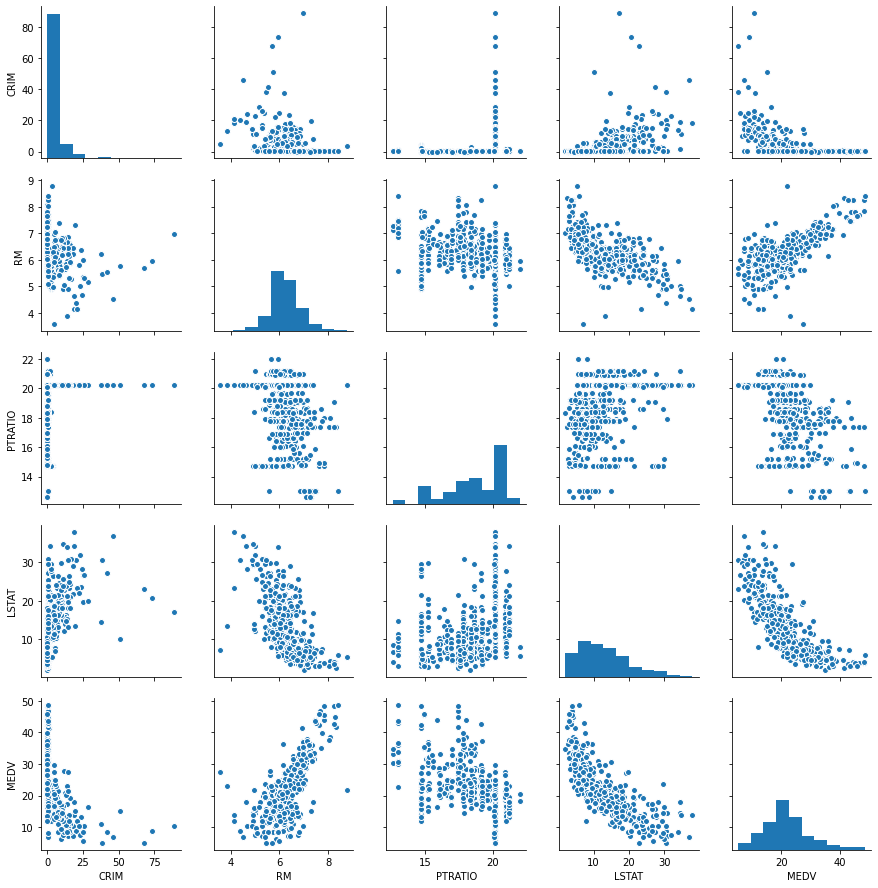

In [ ]:
sn.pairplot(boston[['CRIM','RM','PTRATIO','LSTAT','MEDV']])

In [ ]:
boston = boston.drop(boston[boston['MEDV']==boston['MEDV'].max()].index.tolist())

In [ ]:
X = boston.drop(columns='MEDV')[['CRIM','RM','PTRATIO','LSTAT','RM*LSTAT']]
y = boston['MEDV']
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE: 3.502
R_squared: 0.801


In [ ]:
boston['LSTAT_2']=boston['LSTAT']**2

In [ ]:
X = boston.drop(columns='MEDV')[['CRIM','RM','RM_2','PTRATIO','LSTAT']]
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))